<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           4250 non-null   int64  
 1   number          4250 non-null   int64  
 2   title           4250 non-null   object 
 3   classification  4250 non-null   object 
 4   timestamp       4250 non-null   object 
 5   latitude        4250 non-null   float64
 6   longitude       4250 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 232.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               5021 non-null   int64  
 1   observed            4983 non-null   object 
 2   location_details    4260 non-null   object 
 3   county              5021 non-null   object 
 4   state              

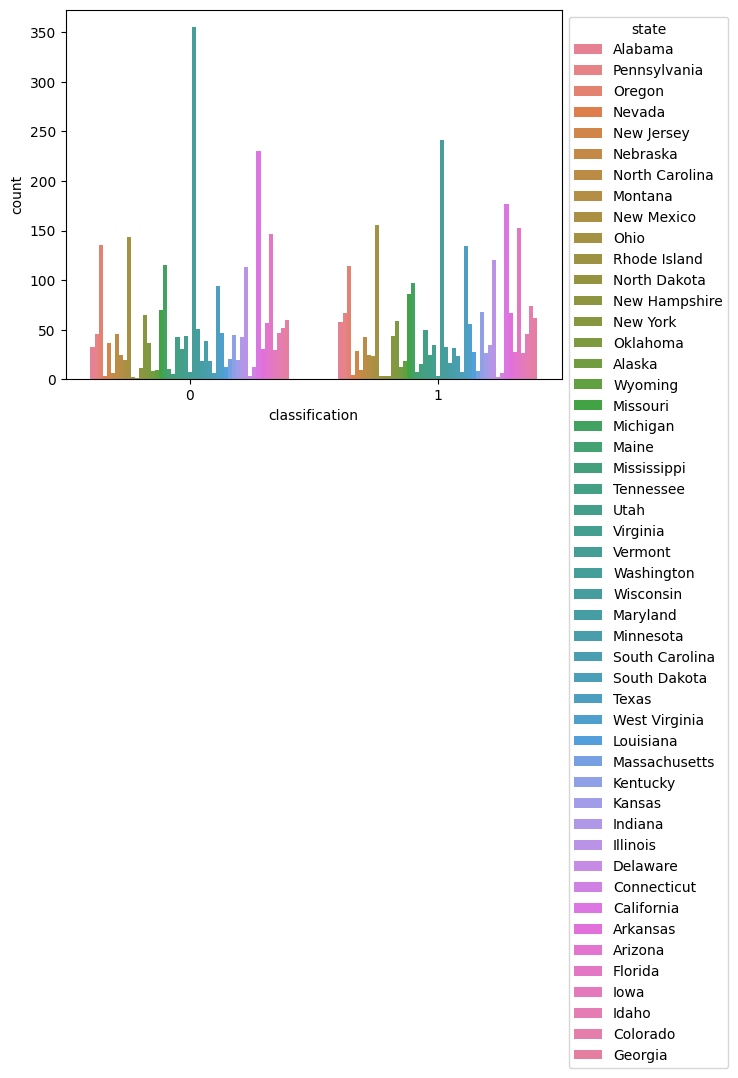

In [1]:
%run EDA.ipynb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, ComplementNB 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [3]:
#uploading dataframe with new processed_text column 
df = pd.read_csv('../data/processed_text.csv')

In [4]:
#dropping the 'Unnamed: 0' column
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,YEAR,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,location_details,county,state,season,title,latitude,longitude,number,classification,geohash,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed,processed_text
0,2010,Double Springs,Highway 33,I was canoeing on the Sipsey river in Alabama....,3 hours before on river while I paused to fix ...,none,"No, but I've had a couple of weird things happ...","Dusk, was a clear day in about the high 80s te...",River running through a very remote forest are...,30680.0,NaN,Winston County,Alabama,Summer,NaN,NaN,NaN,30680.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['can', 'tipsy', 'river', 'alabama', 'dusk', '..."
1,1990,NaN,NaN,Ed L. was salmon fishing with a companion in P...,NaN,On a commercial fishing boat at anchor at the ...,NaN,"Early Fall, in the early 1990's.",NaN,1261.0,East side of Prince William Sound,Valdez-Chitina-Whittier County,Alaska,Fall,NaN,NaN,NaN,1261.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['salmon', 'fish', 'companion', 'prince', 'wil..."
2,1974,Wakefield,Perry Ave.,"While attending U.R.I in the Fall of 1974,I wo...",none,none,"White gorilla was seen in a gravel pit, by a f...","10:00pm, very dark cool night.","Typical new England. Oak,Pine and Maple trees....",6496.0,"Great swamp area, Narragansett Indians",Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45,-71.5,6496.0,1,drm5ucxrc0,78.17,73.425,68.68,65.72,0.86,0.86,0.16,0.0,0.0,NaN,1020.61,Foggy until afternoon.,4.0,2.75,198.0,6.92,"['attend', 'stay', 'girlfriend', 'mother', 'ho..."
3,1972,York; more specifically Manchester twp.,Raintree Road,"Hello, My name is Doug and though I am very re...",My friend noted that he had spent the night be...,3. Don't remember the name of the third. He wa...,Just noting that my friend spent the night bef...,Incident occured somewhere between the hours o...,NaN,8000.0,I would rather not have exact location (listin...,York County,Pennsylvania,Summer,NaN,NaN,NaN,8000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['hello', 'name', 'reluctant', 'post', 'story'..."
4,1984,Yamhill,NW Fairdale,It was May 1984. Two friends and I were up in ...,Not sure. It took me a full 5 years to be able...,There were two other wittness' other than me. ...,NaN,I know that it was May of 1984 because it was ...,Gravel logging road. Very dense fir forests. B...,703.0,"Logging roads north west of Yamhill, OR, about...",Yamhill County,Oregon,Spring,NaN,NaN,NaN,703.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['friend', 'hill', 'yamhill', 'late', 'even', ..."


In [6]:
#defining the predictor/target variables
X = df['processed_text']
y = df['classification']

In [7]:
#splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=88)

## Naive Bayes Classifier - Multinomial

### Using Count Vectorizer

In [8]:
count_vectorizer = CountVectorizer(min_df=0.05, max_df=0.95)
count_X_train = count_vectorizer.fit_transform(X_train.values)
count_X_test = count_vectorizer.transform(X_test.values)

In [9]:
#instantiating the classifier 
count_nb_classifier = MultinomialNB()
count_nb_classifier.fit(count_X_train, y_train)

MultinomialNB()

In [10]:
#using the trained model to predict the classes
y_pred_count = count_nb_classifier.predict(count_X_test)
metrics.accuracy_score(y_test, y_pred_count)

0.7956381260096931

In [11]:
metrics.confusion_matrix(y_test, y_pred_count, labels=[0,1])

array([[453, 150],
       [103, 532]])

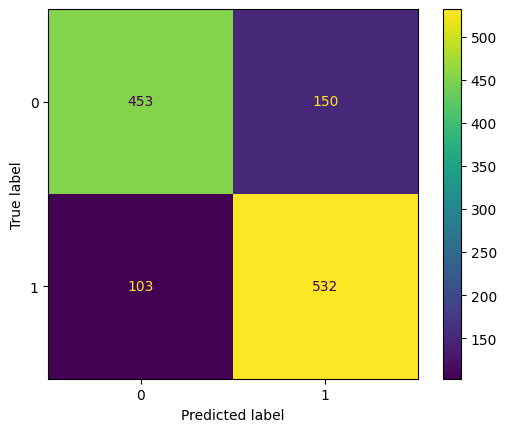

In [12]:
ConfusionMatrixDisplay.from_estimator(count_nb_classifier, count_X_test, y_test);

### Using TF-IDF Vectorizer

In [16]:
tfidf_vectorizer = TfidfVectorizer(min_df=0.05, max_df=0.95)
tfidf_X_train = tfidf_vectorizer.fit_transform(X_train.values)
tfidf_X_test = tfidf_vectorizer.transform(X_test.values)

In [17]:
tfidf_nb_classifier = MultinomialNB()
tfidf_nb_classifier.fit(tfidf_X_train, y_train)

MultinomialNB()

In [18]:
y_pred_tfidf = tfidf_nb_classifier.predict(tfidf_X_test)
metrics.accuracy_score(y_test, y_pred_tfidf)

0.7875605815831987

In [19]:
metrics.confusion_matrix(y_test, y_pred_tfidf, labels=[0, 1])

array([[473, 130],
       [133, 502]])

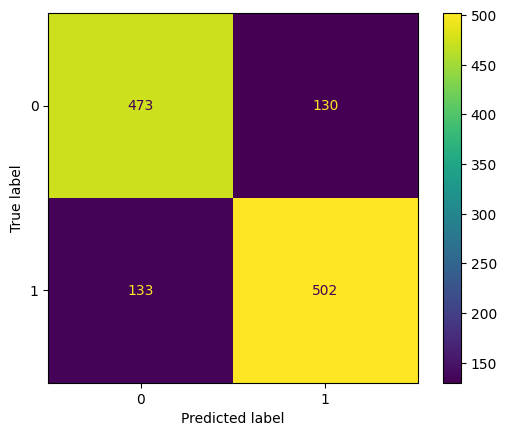

In [20]:
ConfusionMatrixDisplay.from_estimator(tfidf_nb_classifier, tfidf_X_test, y_test);

In [18]:
class_labels = tfidf_nb_classifier.classes_
feature_names = tfidf_vectorizer.get_feature_names_out
feat_with_weights = sorted(zip(tfidf_nb_classifier.coef_[0], feature_names))

AttributeError: 'MultinomialNB' object has no attribute 'coef_'

In [19]:
# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])
# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

NameError: name 'feat_with_weights' is not defined

## Logistic Regression 

In [21]:
logreg = LogisticRegression(random_state=88)
logreg.fit(count_X_train, y_train)

/Users/julieleung/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=88)

In [23]:
y_pred_logreg = logreg.predict(count_X_test)
metrics.accuracy_score(y_test, y_pred_logreg)

0.7697899838449112

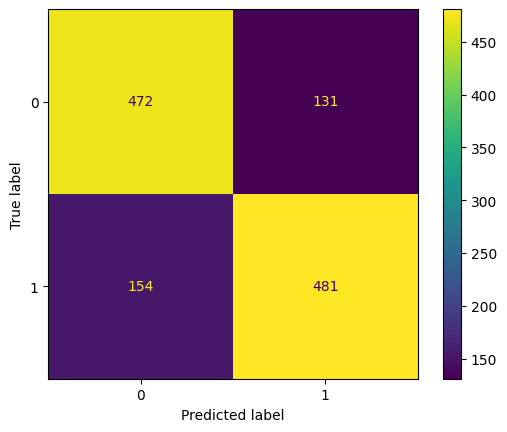

In [24]:
ConfusionMatrixDisplay.from_estimator(logreg, count_X_test, y_test);

In [25]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       603
           1       0.79      0.76      0.77       635

    accuracy                           0.77      1238
   macro avg       0.77      0.77      0.77      1238
weighted avg       0.77      0.77      0.77      1238



In [54]:
logreg_pipe = Pipeline([("logreg", LogisticRegression(random_state=88))])

params = {'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
          'logreg__class_weight': ['balanced'],
          'logreg__solver': ['lbfgs', 'liblinear', 'sag', 'saga']}

logreg_gs = GridSearchCV(logreg_pipe, param_grid=params, cv=5)

In [55]:
logreg_gs.fit(count_X_train, y_train)

/Users/julieleung/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/julieleung/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/julieleung/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/julieleung/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/julieleung/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('logreg',
                                        LogisticRegression(random_state=88))]),
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'logreg__class_weight': ['balanced'],
                         'logreg__solver': ['lbfgs', 'liblinear', 'sag',
                                            'saga']})

In [57]:
best_est = logreg_gs.best_estimator_
best_est

Pipeline(steps=[('logreg',
                 LogisticRegression(C=0.001, class_weight='balanced',
                                    random_state=88, solver='saga'))])

In [58]:
tuned_logreg = LogisticRegression(C=0.001, class_weight='balanced', random_state=88,
                   solver='saga')
tuned_logreg.fit(count_X_train, y_train)

y_pred_tuned_logreg = tuned_logreg.predict(count_X_test)
metrics.accuracy_score(y_test, y_pred_tuned_logreg)

0.8004846526655897

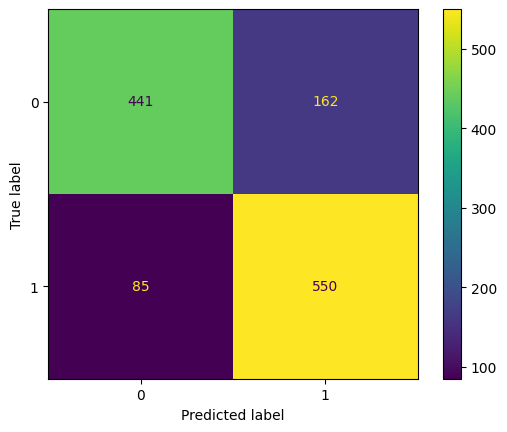

In [53]:
ConfusionMatrixDisplay.from_estimator(tuned_logreg, count_X_test, y_test);

## Decision Tree Classifier

In [31]:
#decision tree model with count vectorizer 
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=88)
tree_clf.fit(count_X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=88)

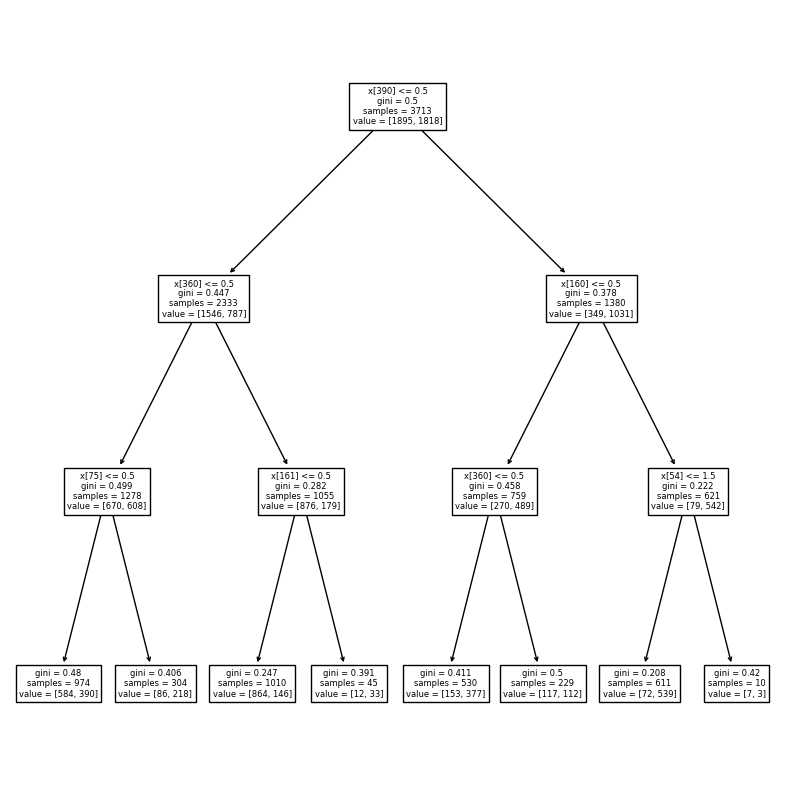

In [32]:
#plotting the decision tree
f, ax =  plt.subplots(figsize=(10,10))
plot_tree(tree_clf, ax=ax);

In [33]:
y_pred_tree_clf = tree_clf.predict(count_X_test)
metrics.accuracy_score(y_test, y_pred_tree_clf)

0.7180936995153473

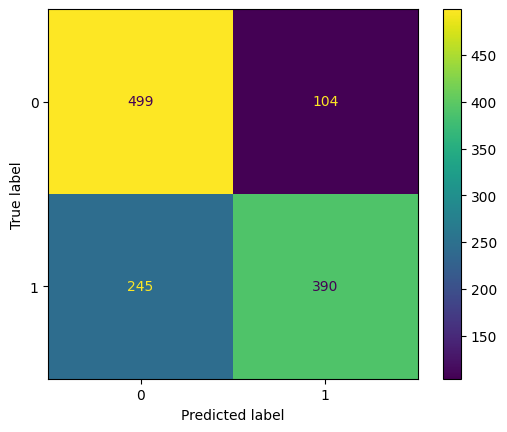

In [44]:
ConfusionMatrixDisplay.from_estimator(tree_clf, count_X_test, y_test);

### Using a Pipeline/GridSearchCV for Decision Tree

In [35]:
 #creating a pipeline and gridsearching over the pipeline
tree_clf_pipe = Pipeline([("tree_clf", DecisionTreeClassifier(random_state=88))])
tree_clf_params = ({'tree_clf__criterion': ['gini', 'entropy', 'log_loss'],
                    'tree_clf__splitter': ['best', 'random'],
                    'tree_clf__max_depth':np.arange(3,30,3),
                    'tree_clf__min_samples_leaf':np.arange(2,10,2),
                    'tree_clf__max_features':np.arange(6,30,2)})
tree_clf_gs = GridSearchCV(tree_clf_pipe, param_grid=tree_clf_params, cv=5)

In [36]:
tree_clf_gs.fit(count_X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tree_clf',
                                        DecisionTreeClassifier(random_state=88))]),
             param_grid={'tree_clf__criterion': ['gini', 'entropy', 'log_loss'],
                         'tree_clf__max_depth': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27]),
                         'tree_clf__max_features': array([ 6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                         'tree_clf__min_samples_leaf': array([2, 4, 6, 8]),
                         'tree_clf__splitter': ['best', 'random']})

In [37]:
best_est = tree_clf_gs.best_estimator_
best_est

Pipeline(steps=[('tree_clf',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        max_features=20, min_samples_leaf=8,
                                        random_state=88))])

In [38]:
tuned_tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=20,
                       min_samples_leaf=8, random_state=88)

tuned_tree_clf.fit(count_X_train, y_train)

y_pred_tuned_tree = tuned_tree_clf.predict(count_X_test)
metrics.accuracy_score(y_test, y_pred_tuned_tree)

0.7237479806138933

Even with the tuned parameters, the accuracy score did not fluctuate much. 

## Random Forest Classifier

In [39]:
#creating a pipeline and gridsearching over the pipeline
rf_pipe = Pipeline([("rf", RandomForestClassifier(random_state=88))])
params = ({'rf__n_estimators':np.arange(4,20,4),
            'rf__max_depth':np.arange(3,30,3),
            'rf__min_samples_leaf':np.arange(2,10,2),
            'rf__max_features':np.arange(6,24,2)})
rf_gs = GridSearchCV(rf_pipe, param_grid=params, cv=5)

In [40]:
rf_gs.fit(count_X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rf',
                                        RandomForestClassifier(random_state=88))]),
             param_grid={'rf__max_depth': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27]),
                         'rf__max_features': array([ 6,  8, 10, 12, 14, 16, 18, 20, 22]),
                         'rf__min_samples_leaf': array([2, 4, 6, 8]),
                         'rf__n_estimators': array([ 4,  8, 12, 16])})

In [45]:
best_est = rf_gs.best_estimator_
best_est

Pipeline(steps=[('rf',
                 RandomForestClassifier(max_depth=24, max_features=22,
                                        min_samples_leaf=8, n_estimators=16,
                                        random_state=88))])

In [46]:
best_par = rf_gs.best_params_
best_par

{'rf__max_depth': 24,
 'rf__max_features': 22,
 'rf__min_samples_leaf': 8,
 'rf__n_estimators': 16}

In [47]:
#running Random Forest with the best parameters
rf_clf = RandomForestClassifier(max_depth=24, max_features=22, min_samples_leaf=8,
                       n_estimators=16, random_state=88)
rf_clf.fit(count_X_train, y_train)

y_pred_rf = rf_clf.predict(count_X_test)
metrics.accuracy_score(y_test, y_pred_rf)

0.7810985460420032

## Extra Trees Classifier

In [48]:
et_pipe = Pipeline([("et", ExtraTreesClassifier(random_state=88))])
params = ({'et__n_estimators':np.arange(4,20,4),
            'et__max_depth':np.arange(3,30,3),
            'et__min_samples_leaf':np.arange(2,10,2),
            'et__max_features':np.arange(6,24,2)})
et_gs = GridSearchCV(et_pipe, param_grid=params, cv=5)

In [49]:
et_gs.fit(count_X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('et',
                                        ExtraTreesClassifier(random_state=88))]),
             param_grid={'et__max_depth': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27]),
                         'et__max_features': array([ 6,  8, 10, 12, 14, 16, 18, 20, 22]),
                         'et__min_samples_leaf': array([2, 4, 6, 8]),
                         'et__n_estimators': array([ 4,  8, 12, 16])})

In [50]:
best_est = et_gs.best_estimator_
best_est

Pipeline(steps=[('et',
                 ExtraTreesClassifier(max_depth=27, max_features=16,
                                      min_samples_leaf=8, n_estimators=16,
                                      random_state=88))])

In [52]:
#running Extra Trees with the best parameters
et_clf = ExtraTreesClassifier(max_depth=27, max_features=16, min_samples_leaf=8,
                     n_estimators=16, random_state=88)

et_clf.fit(count_X_train, y_train)

y_pred_et = et_clf.predict(count_X_test)
metrics.accuracy_score(y_test, y_pred_et)

0.784329563812601

In [62]:
#creating a pipeline 
preprocess_pipeline = Pipeline([('countvec', CountVectorizer(min_df = 0.05, max_df = 0.95))])

In [63]:
#vectorizing the text
X_train_proc = preprocess_pipeline.fit_transform(X_train)

In [64]:
X_train_proc.shape

(3713, 446)

In [65]:
#creating a bag of words 
feat_names = preprocess_pipeline['countvec'].get_feature_names_out()

pd.DataFrame(X_train_proc.toarray(), columns = feat_names)

,able,actually,afraid,afternoon,ago,ahead,air,almost,alone,along,also,always,animal,anyone,anything,anyway,ape,appear,approach,approximately,area,arm,around,arrive,ask,attention,away,back,bad,bank,bark,base,bear,become,bed,begin,believe,best,big,bigfoot,bird,bit,black,body,bottom,branch,break,brother,brown,brush,build,bush,call,camp,campfire,car,carry,catch,check,clear,clearly,climb,close,closer,color,come,completely,continue,corner,country,county,couple,cover,coyote,crazy,creature,creek,cross,cut,dad,dark,day,dead,decide,deep,deer,definitely,describe,detail,different,direction,directly,dirt,disappear,distance,dog,door,drive,drop,due,earlier,early,east,edge,else,ely,encounter,end,enough,entire,estimate,even,ever,everything,exactly,experience,explain,extremely,eye,face,fact,fall,family,far,fast,father,fear,feel,felt,fence,field,fight,figure,finally,find,fire,first,fish,flashlight,flat,follow,foot,footprint,forest,forget,friend,front,full,fur,get,give,go,good,grab,grass,ground,grow,growl,guess,gun,hair,hairy,half,hand,happen,hard,head,headlight,hear,heard,heavy,height,hell,help,hide,high,highway,hill,hit,home,hop,hour,house,however,howl,huge,human,hunt,hunter,husband,idea,immediately,inch,incident,jump,keep,kind,kiss,knew,knock,know,lake,land,large,last,late,later,lay,lead,least,leave,left,leg,legs,less,let,life,light,like,line,listen,little,live,local,locate,location,log,long,longer,look,looked,lose,lot,loud,low,make,man,many,mark,maybe,meet,mention,middle,mile,mind,mine,minute,moment,month,morning,mother,mountain,move,movement,much,name,national,neck,need,neighbor,never,new,next,night,noise,north,note,nothing,notice,noticed,observe,occur,old,open,others,outside,pack,parent,park,part,pass,past,path,people,person,pick,picture,pitch,place,play,point,possible,pretty,print,probably,property,pull,put,quickly,quiet,quite,raise,ran,reach,read,real,realize,really,reason,record,red,remember,report,rest,return,ridge,right,river,road,rock,round,run,sasquatch,saw,say,scar,scared,scream,search,season,second,see,seem,set,several,shake,shape,short,shot,shoulder,show,side,sight,sign,similar,sit,site,size,sleep,slightly,slow,slowly,small,smell,snow,someone,something,son,soon,sort,sound,south,speak,speed,spend,spot,spring,stand,star,start,state,stay,steep,step,stick,still,stood,stop,story,straight,strange,stride,sudden,suddenly,summer,sun,sure,swamp,take,talk,tall,tell,tent,thick,thing,think,thought,throw,time,toe,together,told,top,towards,town,track,trail,travel,tree,trip,truck,try,turn,type,unusual,upright,use,vehicle,view,wait,wake,walk,walked,want,watch,water,way,week,well,west,white,whole,wide,wife,wild,window,witness,wood,wooded,work,yard,year,yell,yes,yet,young
0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,1,0,0,7,0,0,3,0,0,0,0,0,2,0,0,1,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,1,1,2,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,2,0,0,0,0,2,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,3,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,4,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,2,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,1,1,1,0,3,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [66]:
#getting the probability of the classifications
class_priors = y_train.value_counts()/y_train.shape[0]
class_priors

classification
0    0.510369
1    0.489631
Name: count, dtype: float64

In [67]:
bow_mat = pd.DataFrame(X_train_proc.toarray(), columns = feat_names)
bow_mat['target'] = y_train
bow_mat

,able,actually,afraid,afternoon,ago,ahead,air,almost,alone,along,also,always,animal,anyone,anything,anyway,ape,appear,approach,approximately,area,arm,around,arrive,ask,attention,away,back,bad,bank,bark,base,bear,become,bed,begin,believe,best,big,bigfoot,bird,bit,black,body,bottom,branch,break,brother,brown,brush,build,bush,call,camp,campfire,car,carry,catch,check,clear,clearly,climb,close,closer,color,come,completely,continue,corner,country,county,couple,cover,coyote,crazy,creature,creek,cross,cut,dad,dark,day,dead,decide,deep,deer,definitely,describe,detail,different,direction,directly,dirt,disappear,distance,dog,door,drive,drop,due,earlier,early,east,edge,else,ely,encounter,end,enough,entire,estimate,even,ever,everything,exactly,experience,explain,extremely,eye,face,fact,fall,family,far,fast,father,fear,feel,felt,fence,field,fight,figure,finally,find,fire,first,fish,flashlight,flat,follow,foot,footprint,forest,forget,friend,front,full,fur,get,give,go,good,grab,grass,ground,grow,growl,guess,gun,hair,hairy,half,hand,happen,hard,head,headlight,hear,heard,heavy,height,hell,help,hide,high,highway,hill,hit,home,hop,hour,house,however,howl,huge,human,hunt,hunter,husband,idea,immediately,inch,incident,jump,keep,kind,kiss,knew,knock,know,lake,land,large,last,late,later,lay,lead,least,leave,left,leg,legs,less,let,life,light,like,line,listen,little,live,local,locate,location,log,long,longer,look,looked,lose,lot,loud,low,make,man,many,mark,maybe,meet,mention,middle,mile,mind,mine,minute,moment,month,morning,mother,mountain,move,movement,much,name,national,neck,need,neighbor,never,new,next,night,noise,north,note,nothing,notice,noticed,observe,occur,old,open,others,outside,pack,parent,park,part,pass,past,path,people,person,pick,picture,pitch,place,play,point,possible,pretty,print,probably,property,pull,put,quickly,quiet,quite,raise,ran,reach,read,real,realize,really,reason,record,red,remember,report,rest,return,ridge,right,river,road,rock,round,run,sasquatch,saw,say,scar,scared,scream,search,season,second,see,seem,set,several,shake,shape,short,shot,shoulder,show,side,sight,sign,similar,sit,site,size,sleep,slightly,slow,slowly,small,smell,snow,someone,something,son,soon,sort,sound,south,speak,speed,spend,spot,spring,stand,star,start,state,stay,steep,step,stick,still,stood,stop,story,straight,strange,stride,sudden,suddenly,summer,sun,sure,swamp,take,talk,tall,tell,tent,thick,thing,think,thought,throw,time,toe,together,told,top,towards,town,track,trail,travel,tree,trip,truck,try,turn,type,unusual,upright,use,vehicle,view,wait,wake,walk,walked,want,watch,water,way,week,well,west,white,whole,wide,wife,wild,window,witness,wood,wooded,work,yard,year,yell,yes,yet,young,target
0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,1,0,0,7,0,0,3,0,0,0,0,0,2,0,0,1,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,1,1,2,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,2,0,0,0,0,2,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,3,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,4,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,2,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,1,1,1,0,3,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,1,0,0,NaN
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [68]:
class1_bow_mat = bow_mat[bow_mat['target'] == 1].drop(columns = ['target'])

# class 1 token probabilities:
N_tok_1 = class1_bow_mat.sum(axis = 0) #number of count for each token
N_1 =  class1_bow_mat.values.sum() #total number of token in class

# get probabilities for each token: class 1
proba_c1 = N_tok_1/N_1

proba_c1.sort_values(ascending = False)[0:10]

see      0.016462
back     0.015043
look     0.014381
get      0.013787
go       0.012760
road     0.011842
saw      0.011335
sound    0.010849
area     0.010801
foot     0.010578
dtype: float64

In [69]:
class0_bow_mat = bow_mat[bow_mat['target'] == 0].drop(columns = ['target'])

# class 0 token probabilities:
N_tok_0 = class0_bow_mat.sum(axis = 0)
N_0 =  class0_bow_mat.values.sum() 

# get probabilities for each token: class 0
proba_c0 = N_tok_0/N_0

proba_c0.sort_values(ascending = False)[0:10]

see      0.016847
look     0.015979
back     0.014039
get      0.013715
go       0.013198
saw      0.011456
sound    0.011284
time     0.011125
road     0.010768
foot     0.010490
dtype: float64

In [70]:
from scipy.stats import multinomial

In [71]:
X_train.iloc[60]

"['winter', 'jay', 'lake', 'area', 'west', 'branch', 'state', 'park', 'friend', 'fish', 'pond', 'pond', 'mostly', 'frozen', 'spot', 'middle', 'cast', 'bait', 'dont', 'know', 'long', 'fishing', 'pond', 'figure', 'stand', 'shoreline', 'area', 'walk', 'steep', 'hill', 'get', 'top', 'turn', 'back', 'look', 'figure', 'large', 'cover', 'hair', 'walk', 'leg', 'winter', 'pond', 'frozen', 'figure', 'wear', 'clothes', 'norway', 'human', 'yes', 'old', 'take', 'scar', 'encounter', 'view', 'figure', 'maybe', 'minute']"

In [72]:
# bow vector for document
bow_mat_feat = bow_mat.drop(columns = ['target'])
word_vec = bow_mat_feat.iloc[60]
word_vec

able         0
actually     0
afraid       0
afternoon    0
ago          0
            ..
year         0
yell         0
yes          1
yet          0
young        0
Name: 60, Length: 446, dtype: int64

In [73]:
y_train.iloc[60]

1

In [74]:
article_length = word_vec.sum()
article_length

40

In [75]:
class1_likelihood = multinomial.pmf(x = word_vec.values, n = article_length, p =  proba_c1.values) #word_vec.values the counts, the x1, x2, ...xd
class0_likelihood = multinomial.pmf(x = word_vec.values, n = article_length, p =  proba_c0.values)

In [76]:
class1_likelihood*class_priors[1]

3.807451047084969e-55

In [77]:
class0_likelihood*class_priors[0]

1.8404186796396837e-55

In [78]:
np.log10(class1_likelihood*class_priors[1])

-54.41936567173914

In [79]:
np.log10(class0_likelihood*class_priors[0])

-54.735083367439806

In [80]:
from copy import deepcopy
mod_pipe = deepcopy(preprocess_pipeline)
mod_pipe.steps.append(('multinb', MultinomialNB()))
mod_pipe.steps

[('countvec', CountVectorizer(max_df=0.95, min_df=0.05)),
 ('multinb', MultinomialNB())]

In [81]:
mod_pipe.fit(X_train, y_train)

Pipeline(steps=[('countvec', CountVectorizer(max_df=0.95, min_df=0.05)),
                ('multinb', MultinomialNB())])

In [82]:
y_pred = mod_pipe.predict(X_test)

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       603
           1       0.78      0.84      0.81       635

    accuracy                           0.80      1238
   macro avg       0.80      0.79      0.79      1238
weighted avg       0.80      0.80      0.80      1238



In [84]:
roc_auc_score(y_test, y_pred)

0.7945195283425392

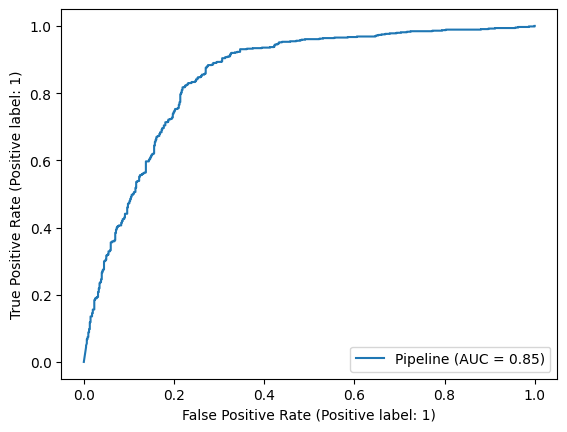

In [85]:
RocCurveDisplay.from_estimator(mod_pipe, X_test, y_test)

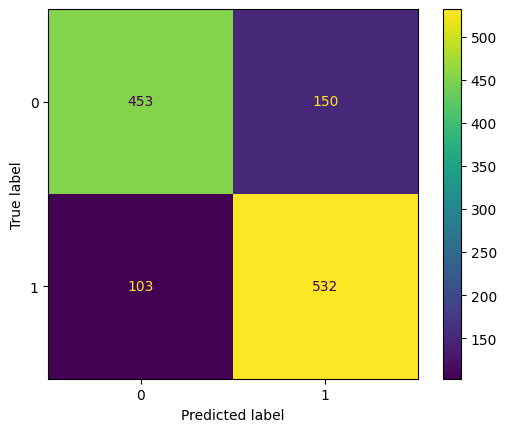

In [86]:
ConfusionMatrixDisplay.from_estimator(mod_pipe, X_test, y_test);

### Pipeline with TF-IDF Vectorizer

In [87]:
#creating a pipeline using tfidf vectorizer 
tfidfmod_pipe = deepcopy(mod_pipe)
tfidfmod_pipe.steps[0] = ('tfidf', TfidfVectorizer(min_df=0.05, max_df=0.95)) # cuts words too rare/too frequent
tfidfmod_pipe.steps

[('tfidf', TfidfVectorizer(max_df=0.95, min_df=0.05)),
 ('multinb', MultinomialNB())]

In [88]:
tfidfmod_pipe.fit(X_train, y_train)
ypred_tfidf = tfidfmod_pipe.predict(X_test)

In [89]:
roc_auc_score(y_test, ypred_tfidf)

0.7874812290254762

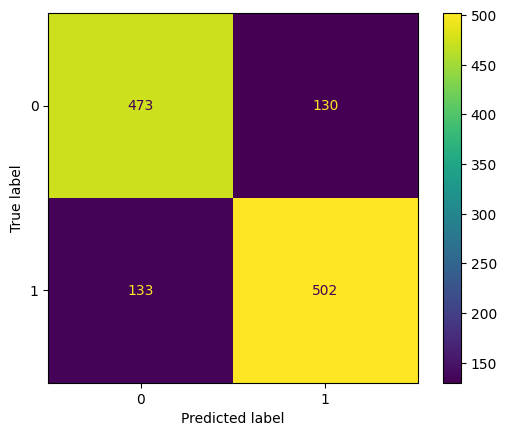

In [90]:
ConfusionMatrixDisplay.from_estimator(tfidfmod_pipe, X_test, y_test);

### Complement Naive Bayes

In [91]:
mod_comp_pipe = deepcopy(preprocess_pipeline)
mod_comp_pipe.steps.append(('compnb', ComplementNB()))
mod_comp_pipe.steps

[('countvec', CountVectorizer(max_df=0.95, min_df=0.05)),
 ('compnb', ComplementNB())]

In [92]:
mod_comp_pipe.fit(X_train, y_train)
y_pred_comp = mod_comp_pipe.predict(X_test)

In [93]:
metrics.accuracy_score(y_test, y_pred_comp)

0.7972536348949919

In [94]:
print(classification_report(y_test, y_pred_comp))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       603
           1       0.78      0.84      0.81       635

    accuracy                           0.80      1238
   macro avg       0.80      0.80      0.80      1238
weighted avg       0.80      0.80      0.80      1238



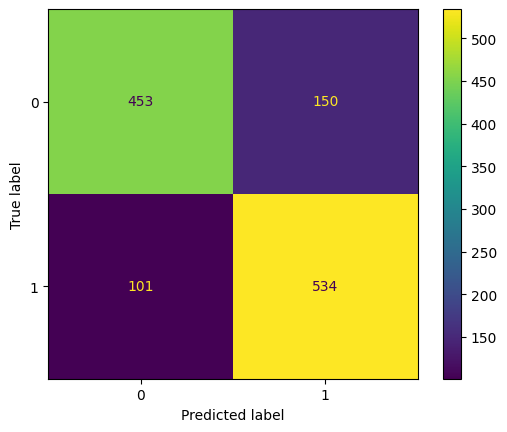

In [97]:
ConfusionMatrixDisplay.from_estimator(mod_comp_pipe, X_test, y_test);

### Topic Modeling

In [ ]:
# pip install pyLDAvis

In [98]:
import pyLDAvis.gensim # a specialized package for topic model visualization
from gensim import corpora
from gensim.corpora import Dictionary
#modeling and dimensionality reduction for visuaization
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

In [99]:
corpus = df['processed_text']
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(corpus)
X_train

<4951x14912 sparse matrix of type '<class 'numpy.float64'>'
	with 519796 stored elements in Compressed Sparse Row format>

In [100]:
topic_model = NMF(n_components = 5, random_state=88)
topic_model.fit(X_train)

NMF(n_components=5, random_state=88)

In [101]:
# to get H
H = topic_model.transform(X_train) # transform document into topic vector representation

# to get W 
W = topic_model.components_ # word component weights for each topic

print("Shape of W is " + str(W.shape))
print("Shape of H is " + str(H.shape))
print("Shape of X_train is " + str(X_train.shape))

Shape of W is (5, 14912)
Shape of H is (4951, 5)
Shape of X_train is (4951, 14912)


In [102]:
W[1] #weights of the word for given topic 

array([0.        , 0.00056747, 0.00112738, ..., 0.        , 0.        ,
       0.00183294])

In [103]:
df['OBSERVED'][0]

'I was canoeing on the Sipsey river in Alabama. It was dusk as I was pulling out of the river and I was trying to hurry to get all my gear in the car before it got dark as it was about a 60 yard walk up this steep hill to where my car was. Just as I was flipping the canoe up to put on my shoulders I heard this very loud "WHOOOOP, WHOOOP, WHOOOP, WHOOOP", then a pause then three more whoops. I \'ve been in the woods enough to know it was not an owl or like any sound I\'ve EVER heard in the woods or on a river. Too loud, too powerful. It felt like it came frome about a quarter to a half mile away. It scared the piss out of me. You\'ve never seen a guy hustle a 75 lbs canoe on their shoulders and practically run up the hill. I didn\'t even tie it on properly until I got up to the highway. The weird part was I had been watching the Monster Quest series and the month before had come down the same river and thought "This area looks just like that crap they show in the Pacific Northwest where

In [104]:
df['processed_text'][0]

"['can', 'tipsy', 'river', 'alabama', 'dusk', 'pull', 'river', 'try', 'hurry', 'get', 'gear', 'car', 'get', 'dark', 'yard', 'walk', 'steep', 'hill', 'car', 'slip', 'canoe', 'put', 'shoulder', 'hear', 'loud', 'whoooop', 'whooop', 'whooop', 'whooop', 'troop', 'wood', 'enough', 'know', 'owl', 'sound', 'ever', 'heard', 'wood', 'river', 'loud', 'powerful', 'felt', 'come', 'quarter', 'half', 'mile', 'away', 'scared', 'pas', 'never', 'see', 'guy', 'rustle', 'les', 'canoe', 'shoulder', 'practically', 'run', 'hill', 'even', 'tie', 'properly', 'get', 'highway', 'weird', 'part', 'watch', 'monster', 'guest', 'series', 'month', 'come', 'river', 'think', 'area', 'look', 'cap', 'show', 'pacific', 'northwest', 'bogfoots', 'wonder', 'ever', 'bigfoot', 'alabama', 'internet', 'search', 'surprise', 'cap', 'find', 'whole', 'breaking', 'webster', 'alabama', 'bigfoot', 'sound', 'heard', 'sound', 'troop', 'web', 'site', 'course', 'watching', 'show', 'somebody', 'call', 'blast', 'thing', 'remain', 'alabama', '

In [105]:
for index,topic in enumerate(W):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-25:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['come', 'know', 'way', 'truck', 'time', 'saw', 'stand', 'friend', 'something', 'think', 'move', 'trail', 'area', 'river', 'start', 'go', 'wood', 'deer', 'hunt', 'look', 'walk', 'see', 'back', 'get', 'tree']


THE TOP 10 WORDS FOR TOPIC #1
['pitch', 'coyote', 'come', 'second', 'last', 'sleep', 'minute', 'listen', 'record', 'call', 'knock', 'area', 'time', 'make', 'animal', 'noise', 'howl', 'tent', 'night', 'loud', 'camp', 'scream', 'hear', 'heard', 'sound']


THE TOP 10 WORDS FOR TOPIC #2
['make', 'boot', 'day', 'measure', 'deep', 'mud', 'follow', 'stride', 'human', 'long', 'wide', 'size', 'take', 'large', 'area', 'picture', 'trail', 'find', 'toe', 'foot', 'footprint', 'snow', 'inch', 'print', 'track']


THE TOP 10 WORDS FOR TOPIC #3
['slow', 'home', 'right', 'headlight', 'animal', 'long', 'large', 'arm', 'highway', 'dark', 'front', 'head', 'turn', 'foot', 'hair', 'tall', 'look', 'side', 'see', 'cross', 'creature', 'saw', 'car', 'drive', 'road']


THE TOP 

In [106]:
%%capture topic_word_plot
def plot_top_words(W, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(15, 8), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(W):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=25)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20
tfidf_feature_names = vectorizer.get_feature_names_out()
plot_top_words(W, tfidf_feature_names, n_top_words, "Topics in NMF model")

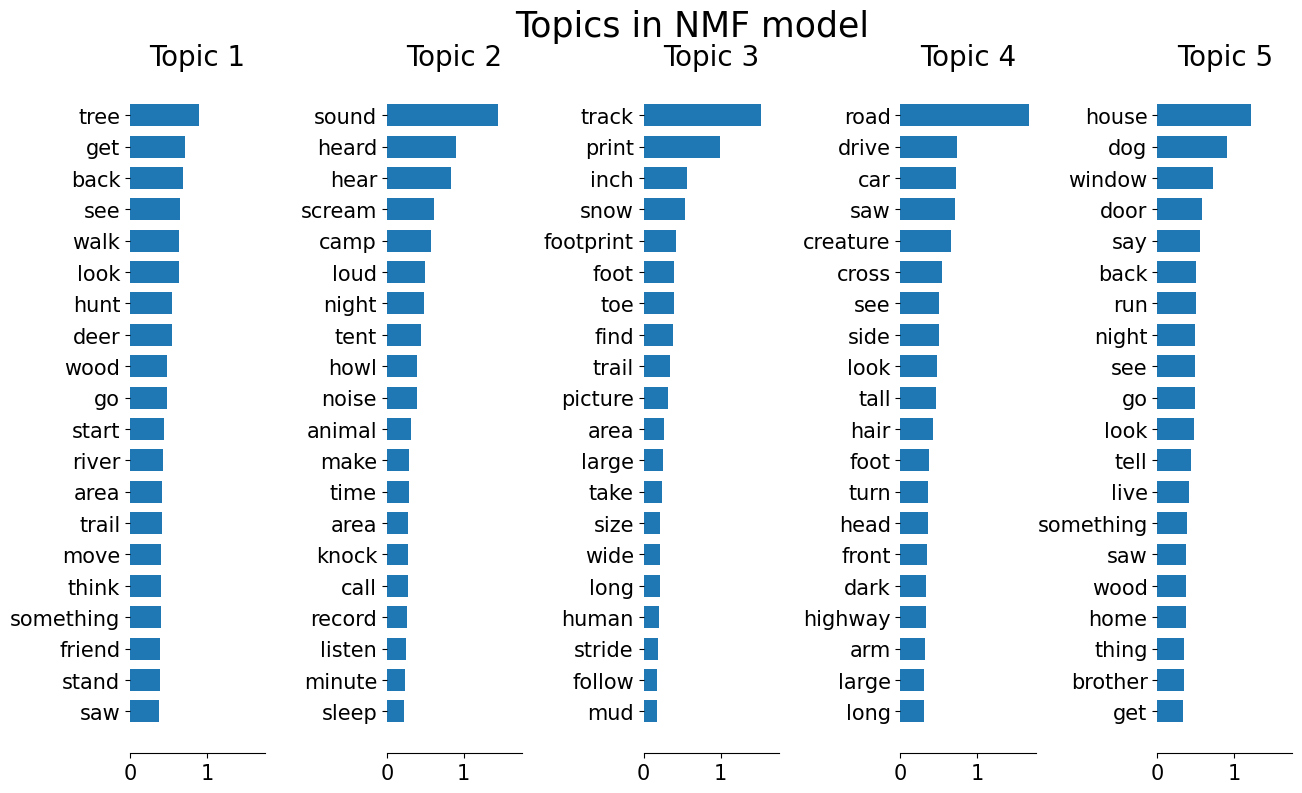

In [107]:
topic_word_plot()

In [108]:
df

,YEAR,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,location_details,county,state,season,title,latitude,longitude,number,classification,geohash,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed,processed_text
0,2010,Double Springs,Highway 33,I was canoeing on the Sipsey river in Alabama....,3 hours before on river while I paused to fix ...,none,"No, but I've had a couple of weird things happ...","Dusk, was a clear day in about the high 80s te...",River running through a very remote forest are...,30680.0,NaN,Winston County,Alabama,Summer,NaN,NaN,NaN,30680.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['can', 'tipsy', 'river', 'alabama', 'dusk', '..."
1,1990,NaN,NaN,Ed L. was salmon fishing with a companion in P...,NaN,On a commercial fishing boat at anchor at the ...,NaN,"Early Fall, in the early 1990's.",NaN,1261.0,East side of Prince William Sound,Valdez-Chitina-Whittier County,Alaska,Fall,NaN,NaN,NaN,1261.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['salmon', 'fish', 'companion', 'prince', 'wil..."
2,1974,Wakefield,Perry Ave.,"While attending U.R.I in the Fall of 1974,I wo...",none,none,"White gorilla was seen in a gravel pit, by a f...","10:00pm, very dark cool night.","Typical new England. Oak,Pine and Maple trees....",6496.0,"Great swamp area, Narragansett Indians",Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45,-71.5,6496.0,1,drm5ucxrc0,78.17,73.425,68.68,65.72,0.86,0.86,0.16,0.0,0.0,NaN,1020.61,Foggy until afternoon.,4.0,2.75,198.0,6.92,"['attend', 'stay', 'girlfriend', 'mother', 'ho..."
3,1972,York; more specifically Manchester twp.,Raintree Road,"Hello, My name is Doug and though I am very re...",My friend noted that he had spent the night be...,3. Don't remember the name of the third. He wa...,Just noting that my friend spent the night bef...,Incident occured somewhere between the hours o...,NaN,8000.0,I would rather not have exact location (listin...,York County,Pennsylvania,Summer,NaN,NaN,NaN,8000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['hello', 'name', 'reluctant', 'post', 'story'..."
4,1984,Yamhill,NW Fairdale,It was May 1984. Two friends and I were up in ...,Not sure. It took me a full 5 years to be able...,There were two other wittness' other than me. ...,NaN,I know that it was May of 1984 because it was ...,Gravel logging road. Very dense fir forests. B...,703.0,"Logging roads north west of Yamhill, OR, about...",Yamhill County,Oregon,Spring,NaN,NaN,NaN,703.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['friend', 'hill', 'yamhill', 'late', 'even', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4946,2005,dulce nm,(withheld),while camping protecting other equipment befor...,no frist time camping there,"one nephew, my two son where sleeping",local people talk off seeing bigfoot in the ar...,"moon was half full, about 0330 hrs. clear skys...","mountain valley, with ridges and canyons, pine...",11992.0,(withheld),Rio Arriba County,New Mexico,Summer,NaN,NaN,NaN,11992.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['camp', 'protect', 'equipment', 'feat', 'star..."
4947,1976,NaN,NaN,I was on my way to work on a Saturday morning ...,NaN,I was on my way to work around 7 am on a Satur...,NaN,NaN,there is an undeveloped area of land that stra...,1171.0,"Laurel, Maryland. It was sighted off of Rt 19...",Prince George's County,Maryland,Spring,NaN,NaN,NaN,1171.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['way', 'work', 'saturday', 'morning', 'misty'..."
4948,2011,Sorrento,Mt.Plymou

In [109]:
tsne = TSNE(random_state=42, learning_rate=100)
tsne_trans = tsne.fit_transform(H)
tsne_trans = pd.DataFrame(tsne_trans, columns = ['TSNE1', 'TSNE2'])

In [110]:
topic_name_dict = {0: 'Class B', 1: 'Class A'}

In [111]:
# for each document take the topic with the highest weight and assign the document to this class -- hard clustering.
tsne_trans['class'] = np.argmax(H, axis = 1)
tsne_trans['class'] = tsne_trans['class'].replace(topic_name_dict)

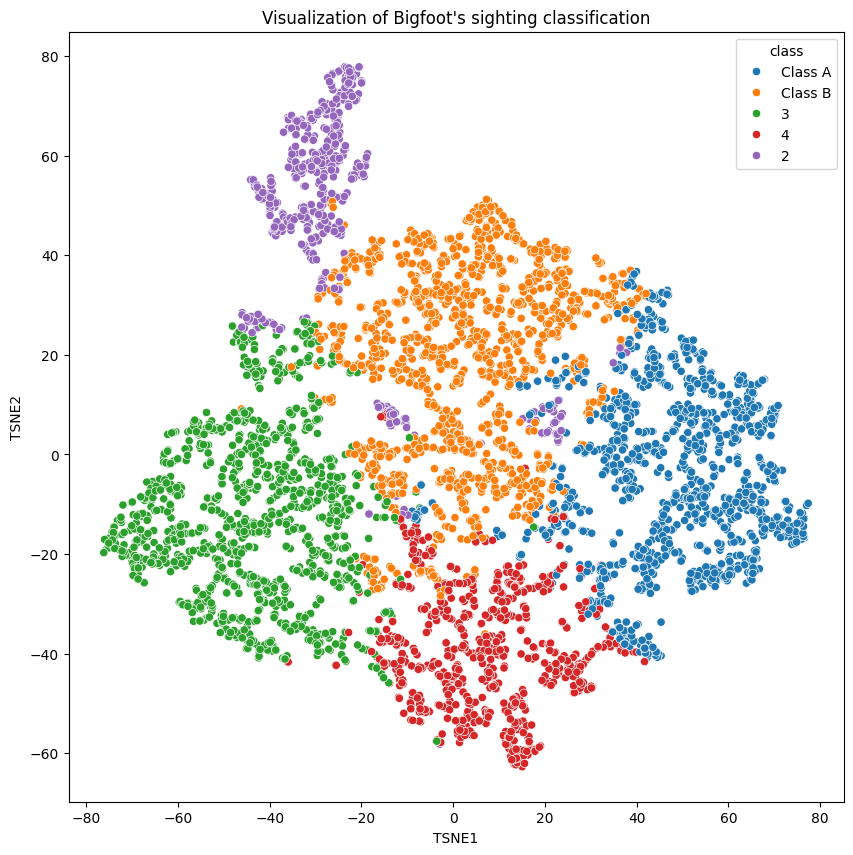

In [112]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'class', data = tsne_trans, palette = 'tab10')
plt.title("Visualization of Bigfoot's sighting classification")
plt.show()

### Miscell.

In [95]:
#the last 100 features
count_vectorizer.get_feature_names_out()[:20]

array(['able', 'actually', 'afraid', 'afternoon', 'ago', 'ahead', 'air',
       'almost', 'alone', 'along', 'also', 'always', 'animal', 'anyone',
       'anything', 'anyway', 'ape', 'appear', 'approach', 'approximately'],
      dtype=object)

In [96]:
sorted(count_vectorizer.vocabulary_.items(), reverse = False)

[('able', 0),
 ('actually', 1),
 ('afraid', 2),
 ('afternoon', 3),
 ('ago', 4),
 ('ahead', 5),
 ('air', 6),
 ('almost', 7),
 ('alone', 8),
 ('along', 9),
 ('also', 10),
 ('always', 11),
 ('animal', 12),
 ('anyone', 13),
 ('anything', 14),
 ('anyway', 15),
 ('ape', 16),
 ('appear', 17),
 ('approach', 18),
 ('approximately', 19),
 ('area', 20),
 ('arm', 21),
 ('around', 22),
 ('arrive', 23),
 ('ask', 24),
 ('attention', 25),
 ('away', 26),
 ('back', 27),
 ('bad', 28),
 ('bank', 29),
 ('bark', 30),
 ('base', 31),
 ('bear', 32),
 ('become', 33),
 ('bed', 34),
 ('begin', 35),
 ('believe', 36),
 ('best', 37),
 ('big', 38),
 ('bigfoot', 39),
 ('bird', 40),
 ('bit', 41),
 ('black', 42),
 ('body', 43),
 ('bottom', 44),
 ('branch', 45),
 ('break', 46),
 ('brother', 47),
 ('brown', 48),
 ('brush', 49),
 ('build', 50),
 ('bush', 51),
 ('call', 52),
 ('camp', 53),
 ('campfire', 54),
 ('car', 55),
 ('carry', 56),
 ('catch', 57),
 ('check', 58),
 ('clear', 59),
 ('clearly', 60),
 ('climb', 61),
 ('cl

In [113]:
df['processed_text'].iloc[0]

"['can', 'tipsy', 'river', 'alabama', 'dusk', 'pull', 'river', 'try', 'hurry', 'get', 'gear', 'car', 'get', 'dark', 'yard', 'walk', 'steep', 'hill', 'car', 'slip', 'canoe', 'put', 'shoulder', 'hear', 'loud', 'whoooop', 'whooop', 'whooop', 'whooop', 'troop', 'wood', 'enough', 'know', 'owl', 'sound', 'ever', 'heard', 'wood', 'river', 'loud', 'powerful', 'felt', 'come', 'quarter', 'half', 'mile', 'away', 'scared', 'pas', 'never', 'see', 'guy', 'rustle', 'les', 'canoe', 'shoulder', 'practically', 'run', 'hill', 'even', 'tie', 'properly', 'get', 'highway', 'weird', 'part', 'watch', 'monster', 'guest', 'series', 'month', 'come', 'river', 'think', 'area', 'look', 'cap', 'show', 'pacific', 'northwest', 'bogfoots', 'wonder', 'ever', 'bigfoot', 'alabama', 'internet', 'search', 'surprise', 'cap', 'find', 'whole', 'breaking', 'webster', 'alabama', 'bigfoot', 'sound', 'heard', 'sound', 'troop', 'web', 'site', 'course', 'watching', 'show', 'somebody', 'call', 'blast', 'thing', 'remain', 'alabama', '

In [114]:
df['processed_text'][0]

"['can', 'tipsy', 'river', 'alabama', 'dusk', 'pull', 'river', 'try', 'hurry', 'get', 'gear', 'car', 'get', 'dark', 'yard', 'walk', 'steep', 'hill', 'car', 'slip', 'canoe', 'put', 'shoulder', 'hear', 'loud', 'whoooop', 'whooop', 'whooop', 'whooop', 'troop', 'wood', 'enough', 'know', 'owl', 'sound', 'ever', 'heard', 'wood', 'river', 'loud', 'powerful', 'felt', 'come', 'quarter', 'half', 'mile', 'away', 'scared', 'pas', 'never', 'see', 'guy', 'rustle', 'les', 'canoe', 'shoulder', 'practically', 'run', 'hill', 'even', 'tie', 'properly', 'get', 'highway', 'weird', 'part', 'watch', 'monster', 'guest', 'series', 'month', 'come', 'river', 'think', 'area', 'look', 'cap', 'show', 'pacific', 'northwest', 'bogfoots', 'wonder', 'ever', 'bigfoot', 'alabama', 'internet', 'search', 'surprise', 'cap', 'find', 'whole', 'breaking', 'webster', 'alabama', 'bigfoot', 'sound', 'heard', 'sound', 'troop', 'web', 'site', 'course', 'watching', 'show', 'somebody', 'call', 'blast', 'thing', 'remain', 'alabama', '

In [123]:
class_a = df[df['classification'] == 1]
class_b = df[df['classification'] == 0]

In [124]:
class_a['state'].value_counts()

state
Washington        241
California        177
Ohio              156
Florida           153
Texas             134
Illinois          120
Oregon            114
Michigan           97
Missouri           86
Colorado           74
Kentucky           68
Arkansas           67
Pennsylvania       67
Georgia            62
Oklahoma           59
Alabama            58
West Virginia      56
Tennessee          49
Idaho              46
New York           44
North Carolina     43
Indiana            35
Virginia           35
Wisconsin          33
Minnesota          32
New Jersey         29
Arizona            28
Louisiana          28
Iowa               26
Kansas             26
Utah               24
Montana            24
South Carolina     23
New Mexico         23
Wyoming            18
Maryland           16
Mississippi        15
Alaska             12
Nebraska            9
Massachusetts       8
South Dakota        7
Maine               7
Connecticut         6
Nevada              4
Rhode Island        3
Verm

In [125]:
class_b['state'].value_counts()

state
Washington        355
California        230
Florida           147
Ohio              143
Oregon            135
Michigan          115
Illinois          113
Texas              94
Missouri           70
New York           64
Georgia            60
Arizona            57
Colorado           52
Wisconsin          51
West Virginia      47
Idaho              47
Pennsylvania       46
North Carolina     46
Kentucky           45
Virginia           44
Tennessee          43
Indiana            43
Minnesota          39
Oklahoma           37
New Jersey         37
Alabama            33
Utah               31
Arkansas           31
Iowa               30
Montana            24
Massachusetts      20
New Mexico         19
Kansas             19
Maryland           18
South Carolina     18
Louisiana          12
Connecticut        12
New Hampshire      11
Maine              10
Wyoming             9
Alaska              8
Vermont             7
South Dakota        6
Nebraska            6
Mississippi         5
Dela